## PROBLEM 1
1. Lagrange插值from $E_i\approx g(E_i)$
2. 三次样条插值
3. Peak能量和半高全宽

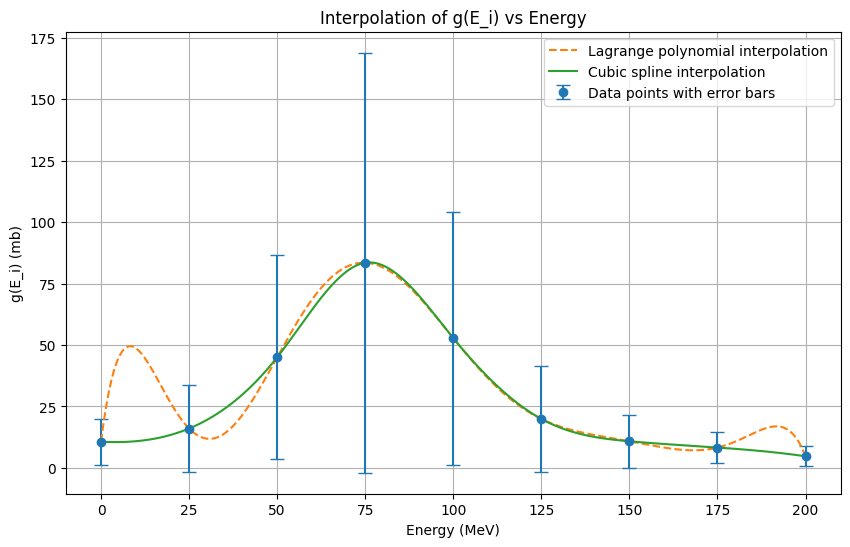

(76.27627627627628, 83.63043325294025, 58.25825825825826)

In [1]:
## 1 Lagrange插值
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline

# Given data points
E_i = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
g_Ei = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
errors = np.array([9.34, 17.9, 41.5, 85.5, 51.5, 21.5, 10.8, 6.29, 4.14])

# Lagrange polynomial interpolation
poly = lagrange(E_i, g_Ei)

# Cubic spline interpolation
cs = CubicSpline(E_i, g_Ei)

# Define a finer grid for plotting
E_fine = np.linspace(0, 200, 1000)
g_Ei_poly = poly(E_fine)
g_Ei_spline = cs(E_fine)

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(E_i, g_Ei, yerr=errors, fmt='o', label='Data points with error bars', capsize=5)
plt.plot(E_fine, g_Ei_poly, label='Lagrange polynomial interpolation', linestyle='--')
plt.plot(E_fine, g_Ei_spline, label='Cubic spline interpolation')
plt.xlabel('Energy (MeV)')
plt.ylabel('g(E_i) (mb)')
plt.legend()
plt.title('Interpolation of g(E_i) vs Energy')
plt.grid(True)
plt.show()

# Find the peak value energy and FWHM for cubic spline interpolation
peak_energy = E_fine[np.argmax(g_Ei_spline)]
peak_value = np.max(g_Ei_spline)
half_max = peak_value / 2

# FWHM calculation
indices_above_half_max = np.where(g_Ei_spline > half_max)[0]
fwhm = E_fine[indices_above_half_max[-1]] - E_fine[indices_above_half_max[0]]

peak_energy, peak_value, fwhm

## PROBLEM 2
1. Without ERROR
2. Within  ERROR

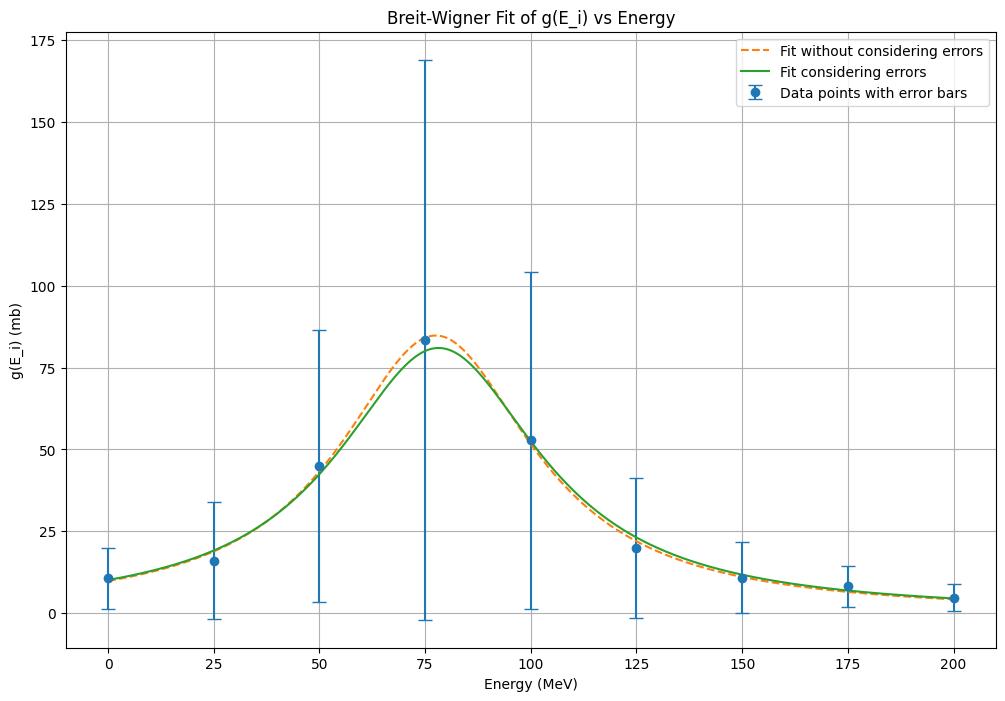

(array([   77.49357883,  -112.34831836, 66886.40181661]),
 array([   78.18754378,   118.33743297, 70878.20035853]))

In [2]:
##
from scipy.optimize import curve_fit

# Define the Breit-Wigner resonance function
def breit_wigner(E, E_r, Gamma, f_r):
    return f_r / ((E - E_r)**2 + (Gamma / 4)**2)

# Initial guess for the parameters
initial_guess = [75, 50, 80]

# Fit without considering errors
params_no_errors, params_covariance_no_errors = curve_fit(breit_wigner, E_i, g_Ei, p0=initial_guess)

# Fit considering errors
params_with_errors, params_covariance_with_errors = curve_fit(breit_wigner, E_i, g_Ei, p0=initial_guess, sigma=errors)

# Extracting parameters and their errors
E_r_no_errors, Gamma_no_errors, f_r_no_errors = params_no_errors
E_r_err_no_errors, Gamma_err_no_errors, f_r_err_no_errors = np.sqrt(np.diag(params_covariance_no_errors))

E_r_with_errors, Gamma_with_errors, f_r_with_errors = params_with_errors
E_r_err_with_errors, Gamma_err_with_errors, f_r_err_with_errors = np.sqrt(np.diag(params_covariance_with_errors))

# Breit-Wigner function values for plotting
g_Ei_fit_no_errors = breit_wigner(E_fine, *params_no_errors)
g_Ei_fit_with_errors = breit_wigner(E_fine, *params_with_errors)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.errorbar(E_i, g_Ei, yerr=errors, fmt='o', label='Data points with error bars', capsize=5)
plt.plot(E_fine, g_Ei_fit_no_errors, label='Fit without considering errors', linestyle='--')
plt.plot(E_fine, g_Ei_fit_with_errors, label='Fit considering errors')
plt.xlabel('Energy (MeV)')
plt.ylabel('g(E_i) (mb)')
plt.legend()
plt.title('Breit-Wigner Fit of g(E_i) vs Energy')
plt.grid(True)
plt.show()

params_no_errors, params_with_errors


ABOVE
no error 参数
with error 参数

## PROBLEM 3
对比

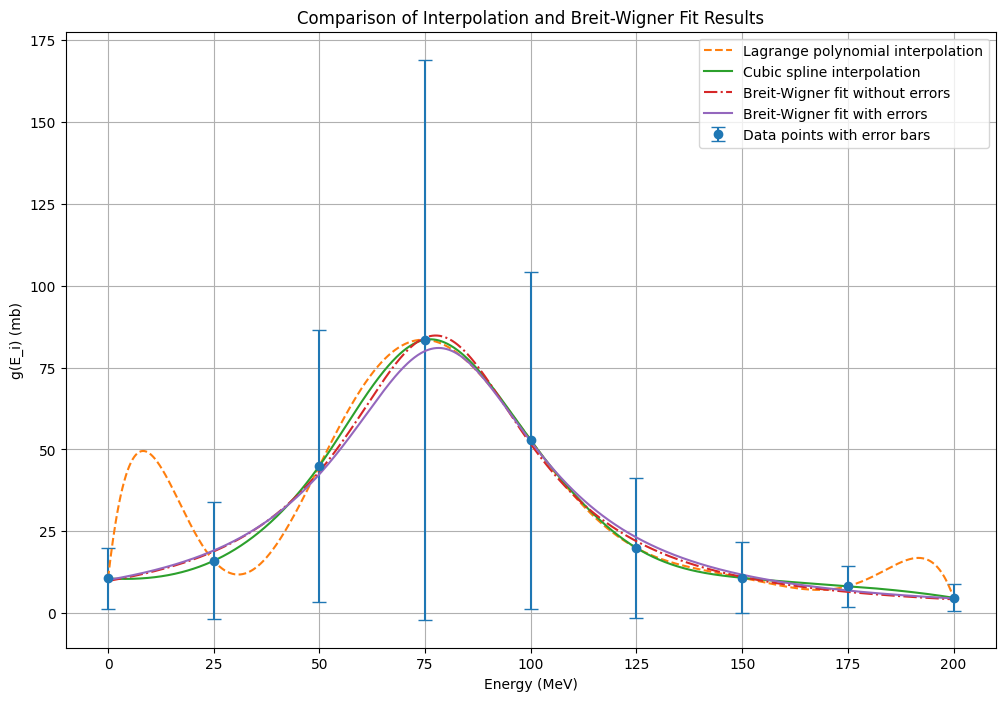

{'Interpolation Peak Energy (MeV)': 76.27627627627628,
 'Interpolation FWHM (MeV)': 58.25825825825826,
 'Fit (No Errors) Peak Energy (MeV)': 77.49357883360986,
 'Fit (No Errors) FWHM (MeV)': -112.3483183571463,
 'Fit (With Errors) Peak Energy (MeV)': 78.1875437849205,
 'Fit (With Errors) FWHM (MeV)': 118.3374329743211}

In [3]:
# Plot comparison of interpolation and fitting results

plt.figure(figsize=(12, 8))
plt.errorbar(E_i, g_Ei, yerr=errors, fmt='o', label='Data points with error bars', capsize=5)
plt.plot(E_fine, g_Ei_poly, label='Lagrange polynomial interpolation', linestyle='--')
plt.plot(E_fine, g_Ei_spline, label='Cubic spline interpolation')
plt.plot(E_fine, g_Ei_fit_no_errors, label='Breit-Wigner fit without errors', linestyle='-.')
plt.plot(E_fine, g_Ei_fit_with_errors, label='Breit-Wigner fit with errors')
plt.xlabel('Energy (MeV)')
plt.ylabel('g(E_i) (mb)')
plt.legend()
plt.title('Comparison of Interpolation and Breit-Wigner Fit Results')
plt.grid(True)
plt.show()

# Peak values and FWHM comparison
peak_energy_interpolation = peak_energy
fwhm_interpolation = fwhm

peak_energy_fit_no_errors = E_r_no_errors
fwhm_fit_no_errors = Gamma_no_errors

peak_energy_fit_with_errors = E_r_with_errors
fwhm_fit_with_errors = Gamma_with_errors

comparison_results = {
    "Interpolation Peak Energy (MeV)": peak_energy_interpolation,
    "Interpolation FWHM (MeV)": fwhm_interpolation,
    "Fit (No Errors) Peak Energy (MeV)": peak_energy_fit_no_errors,
    "Fit (No Errors) FWHM (MeV)": fwhm_fit_no_errors,
    "Fit (With Errors) Peak Energy (MeV)": peak_energy_fit_with_errors,
    "Fit (With Errors) FWHM (MeV)": fwhm_fit_with_errors,
}

comparison_results


## PROBLEM 4
lmfit model

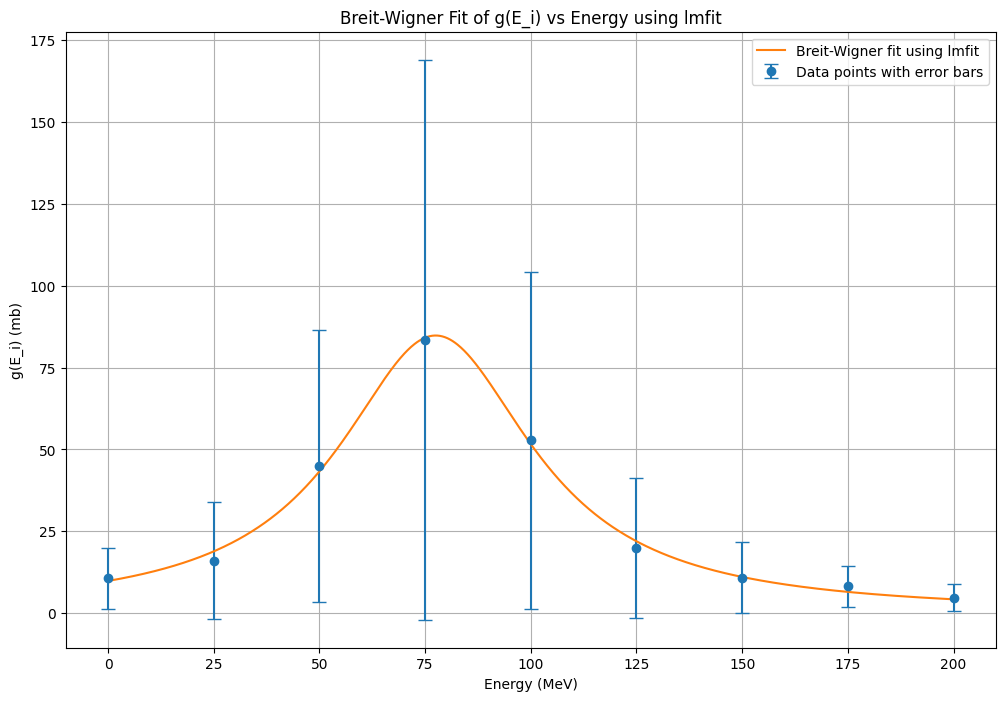

'[[Model]]\n    Model(breit_wigner)\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 99\n    # data points      = 9\n    # variables        = 3\n    chi-square         = 21.0657525\n    reduced chi-square = 3.51095875\n    Akaike info crit   = 13.6538164\n    Bayesian info crit = 14.2454901\n    R-squared          = 0.99632067\n[[Variables]]\n    E_r:    77.4935877 +/- 0.72610206 (0.94%) (init = 75)\n    Gamma: -112.348331 +/- 3.54452714 (3.15%) (init = 50)\n    f_r:    66886.4145 +/- 3438.60680 (5.14%) (init = 80)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(Gamma, f_r) = -0.9463\n    C(E_r, Gamma) = +0.1351\n    C(E_r, f_r)   = -0.1146'

In [5]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt

# Given data points
E_i = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
g_Ei = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
errors = np.array([9.34, 17.9, 41.5, 85.5, 51.5, 21.5, 10.8, 6.29, 4.14])

# Define the Breit-Wigner resonance model
def breit_wigner(E, E_r, Gamma, f_r):
    return f_r / ((E - E_r)**2 + (Gamma / 4)**2)

# Create a model using lmfit
model = lmfit.Model(breit_wigner)

# Initial guess for the parameters
params = model.make_params(E_r=75, Gamma=50, f_r=80)

# Fit the model to the data
result = model.fit(g_Ei, params, E=E_i)

# Print the fit report
fit_report = result.fit_report()

# Define a finer grid for plotting
E_fine = np.linspace(0, 200, 1000)
g_Ei_fit_lmfit = result.eval(E=E_fine)

# Plot the results
plt.figure(figsize=(12, 8))
plt.errorbar(E_i, g_Ei, yerr=errors, fmt='o', label='Data points with error bars', capsize=5)
plt.plot(E_fine, g_Ei_fit_lmfit, label='Breit-Wigner fit using lmfit')
plt.xlabel('Energy (MeV)')
plt.ylabel('g(E_i) (mb)')
plt.legend()
plt.title('Breit-Wigner Fit of g(E_i) vs Energy using lmfit')
plt.grid(True)
plt.show()

fit_report


上面的数据从JUPYTER中查看